# Лабораторная работа №1. Предварительный статистический анализ данных Фишера

### Вариант 8
Для данных Фишера:
1. проверить предположение о том, что математической моделью данных является модель «случайная выборка»;
2.	исследовать закон распределения случайной выборки, соответствующей переменной PETALLLEN;
3.	проверить предположение о нормальном распределении  выборок;
4.	исследовать однородность данных по среднему значению и дисперсии значения переменной PETALLLEN, относящйся к различным типам ирисов, видам SETOSA (1), VIRGINICA (3);
5.	с помощью графического анализа и тестовых статистик проверить предположение о присутствии в данных аномальных наблюдений;
6.	проверить гипотезу о том, что соответствующие выборки наблюдений являются случайными выборками из многомерного нормального распределения; дать содержательную интерпретацию этому предположению.

### Предварительный анализ по всем наблюдениям

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette("Dark2"))
import numpy as np 
import pylab 
import scipy.stats as stats
import warnings 
%matplotlib inline
path="./data/iris.csv"
data = pd.read_csv(path, usecols = ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width','Species'])
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
stats.describe(data['Petal.Length'])

DescribeResult(nobs=150, minmax=(1.0, 6.9), mean=3.7580000000000005, variance=3.116277852348993, skewness=-0.2721276664567214, kurtosis=-1.3955358863990055)

In [4]:
np.median(data['Petal.Length'])

4.35

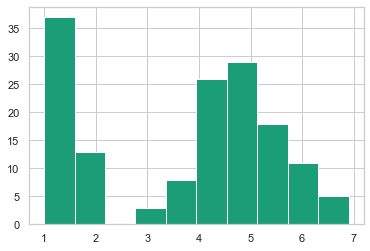

In [5]:
data['Petal.Length'].hist()
plt.show()

**Вывод**: Анализ переменной *Petal.Length* показывает, что ее распределение скошено влево (отрицательный коэффициент асимметрии, медиана отличается от среднего) и имеет более пологую вершину, чем нормальное распределение (отрицательный коэффициент эксцесса). Гистограмма демонстирует неоднородность распределения (наблюдения для различных видов ирисов имеют значимые отличия по данному показателю).

### Используются из имеющихся данных для анализа следующих видов ириса: "setosa" и  "virginica". Переменная для анализа: "PETALLEN"

In [6]:
data1 = pd.read_csv(path, usecols = ['Petal.Length','Species'])
data1.describe()

,Petal.Length
count,150.000000
mean,3.758000
std,1.765298
min,1.000000
25%,1.600000
50%,4.350000
75%,5.100000
max,6.900000



SETOSA:
count    50.000000
mean      1.462000
std       0.173664
min       1.000000
25%       1.400000
50%       1.500000
75%       1.575000
max       1.900000
Name: Petal.Length, dtype: float64

VIRGINICA:
count    50.000000
mean      5.552000
std       0.551895
min       4.500000
25%       5.100000
50%       5.550000
75%       5.875000
max       6.900000
Name: Petal.Length, dtype: float64


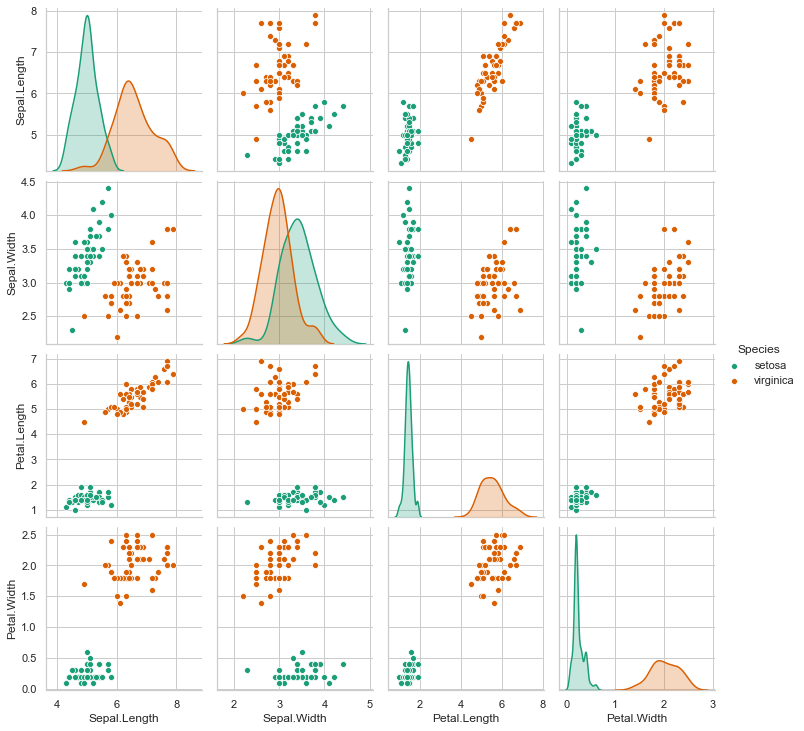

In [7]:
data = data[(data["Species"] == "setosa") | (data["Species"] == "virginica")]
print("\nSETOSA:")
print(data[data["Species"] == "setosa"]["Petal.Length"].describe())
print("\nVIRGINICA:")
print(data[data["Species"] == "virginica"]["Petal.Length"].describe())

sns.pairplot(data, hue='Species')

### 1. Проверить предположение о том, что математической моделью данных является модель «случайная выборка».

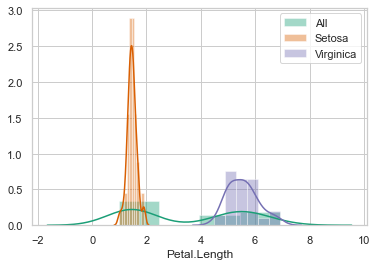

In [8]:
sns.distplot(data["Petal.Length"], label="All")
sns.distplot(data[data["Species"] == "setosa"]["Petal.Length"], label="Setosa")
sns.distplot(data[data["Species"] == "virginica"]["Petal.Length"], label="Virginica")
plt.legend()

Как видно, измерения длин цветков Ириса махрового (Iris Setosa) и Ириса виргинского (Iris Virginica) не зависят друг от друга (независимы в совокупности), а значит выборка обладает стохастической независимостью.
Однако распределения довольно сильно разнятся. Т.е. распределения PETALLEN не соответствуют нормальному распределению. Таким образом, здесь выполняется лишь одно модельное предположение из двух. Следовательно, данные ***не являются случайной выборкой***.

### 2.	Исследовать закон распределения случайной выборки, соответствующей переменной PETALLLEN.

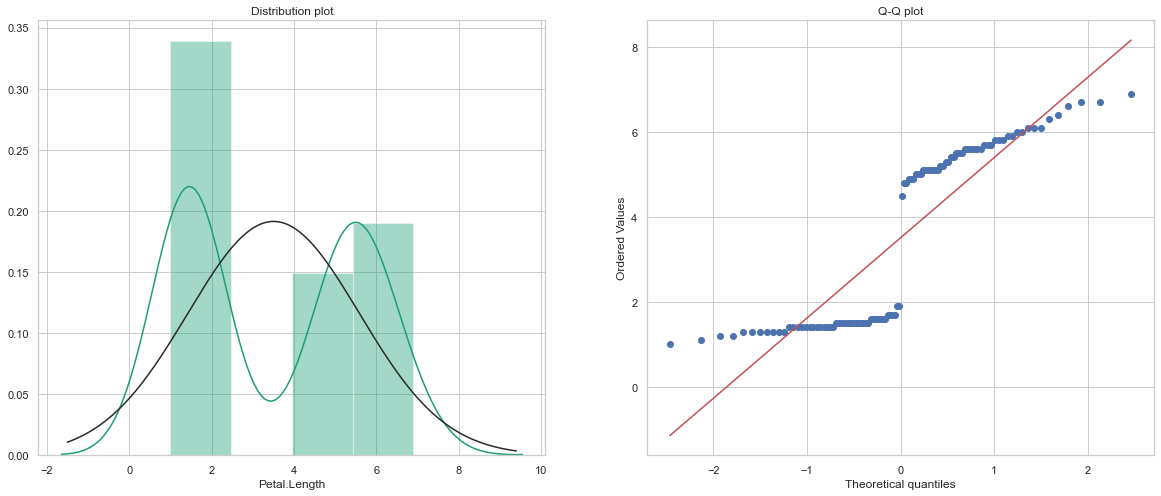

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))
sns.distplot(data["Petal.Length"], ax=axes[0], fit=stats.norm)
stats.probplot(data["Petal.Length"], dist="norm", plot=axes[1])
axes[0].set_title("Distribution plot")
axes[1].set_title("Q-Q plot")
plt.show()

График ***"Квантиль-квантиль"*** сравнивает распределение наблюдаемых значений выборки с теоретическими значениями, которые "должны были бы быть, если бы эта выборки имела нормальное распределение".

Исходя из гистограммы распределения и квантиль-квантиль графика, а также учитывая небольшой размер выборки, видно, что PETALLLEN ***не имеет нормального распределения***.

### 3.	Проверить предположение о нормальном распределении  выборок.

ShapiroResult(statistic=0.7805758714675903, pvalue=6.540025465628929e-11)


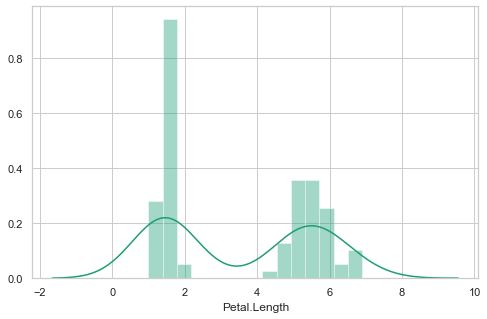

In [10]:
plt.figure(figsize = (8, 5))
sns.distplot(data["Petal.Length"], bins = 15)
print(stats.shapiro(data["Petal.Length"]))

In [11]:
print(stats.shapiro(data["Petal.Length"])) # > 0.05
print()
print(stats.describe(data["Petal.Length"]))
print()
print(stats.describe(stats.zscore(data["Petal.Length"]))) #|min, max| < 3
y = data["Petal.Length"]
print("\nМатематическое ожидание:", data["Petal.Length"].describe()[1])
print("Медиана:", data["Petal.Length"].describe()[5])
print("Мода:", data["Petal.Length"].mode()[0])

ShapiroResult(statistic=0.7805758714675903, pvalue=6.540025465628929e-11)

DescribeResult(nobs=100, minmax=(1.0, 6.9), mean=3.5069999999999997, variance=4.389950505050504, skewness=0.09587798274551167, kurtosis=-1.8308952819712292)

DescribeResult(nobs=100, minmax=(-1.2025604726377044, 1.627557911312219), mean=1.3100631690576846e-16, variance=1.0101010101010102, skewness=0.09587798274551115, kurtosis=-1.8308952819712296)

Математическое ожидание: 3.507000000000001
Медиана: 3.2
Мода: 1.4


- Тест на нормальность Шапиро-Уилка показывает значение pvalue = 6.54 > α=0,05
- Ассиметрия и эксцесс недостаточно малы (0.096 и -1.831 соотвественно; при нормальном распределении имеют нулевые значения)
- Z-score имеет минимальное значение=-1.20, максимальное=1.62. Так как по модулю они < 3, то правило трёх сигм, характерное для нормального распределения, выполняется.
- Математическое ожидание и мода несущественно отличаются (на 0.3), чего нельзя сказать о моде (на 2.1 и на 1.8, соответственно)

Из всего этого можно сделать вывод, что данные ***не имеют нормального распределения***.

### 4.	Исследовать однородность данных по среднему значению и дисперсии значения переменной PETALLLEN, относящйся к различным типам ирисов, видам SETOSA (1), VIRGINICA (3).

In [12]:
print(f"""setosa: {stats.describe(data[data["Species"] == "setosa"]["Petal.Length"])},
        \nvirginica: {stats.describe(data[data["Species"] == "virginica"]["Petal.Length"])}""")

setosa: DescribeResult(nobs=50, minmax=(1.0, 1.9), mean=1.4620000000000002, variance=0.030159183673469384, skewness=0.10317510576481272, kurtosis=0.8045921154263223),
        
virginica: DescribeResult(nobs=50, minmax=(4.5, 6.9), mean=5.5520000000000005, variance=0.30458775510204084, skewness=0.5328219357082301, kurtosis=-0.2564723623466061)


In [13]:
print(stats.ttest_ind(data[data["Species"] == "setosa"]["Petal.Length"], data[data["Species"] == "virginica"]["Petal.Length"]))
print(stats.levene(data[data["Species"] == "setosa"]["Petal.Length"], data[data["Species"] == "virginica"]["Petal.Length"]))

Ttest_indResult(statistic=-49.98618625709594, pvalue=1.5048006992427275e-71)
LeveneResult(statistic=39.57058823529409, pvalue=8.870504350293737e-09)


- По t-критерию Стьюдента pvalue = 1.505, а значит и опровергается гипотеза о равенстве средних. Следовательно, "две выборки не имеют одинаковое среднее значение".
- Из Левене-теста следует, что выборки не имеют равной дисперсии

Т. е. по результатам t-критерия Стьюдента и Левене-теста средние значения двух выборок, как и их дисперсии, различны. Таким образом, ***данные не однородны*** по среднему значению и дисперсии.

### 5.	С помощью графического анализа и тестовых статистик проверить предположение о присутствии в данных аномальных наблюдений.

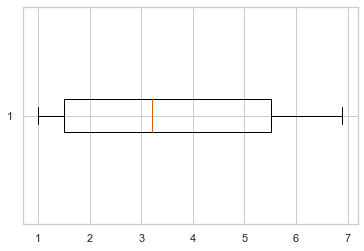

In [14]:
plt.boxplot(data['Petal.Length'].values, vert=False)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x20a9e0f7eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x20a9e1085b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a9e0f7b50>,
 'medians': [<matplotlib.lines.Line2D at 0x20a9e108c70>,
 'fliers': [<matplotlib.lines.Line2D at 0x20a9e108f70>,
 'means': []}

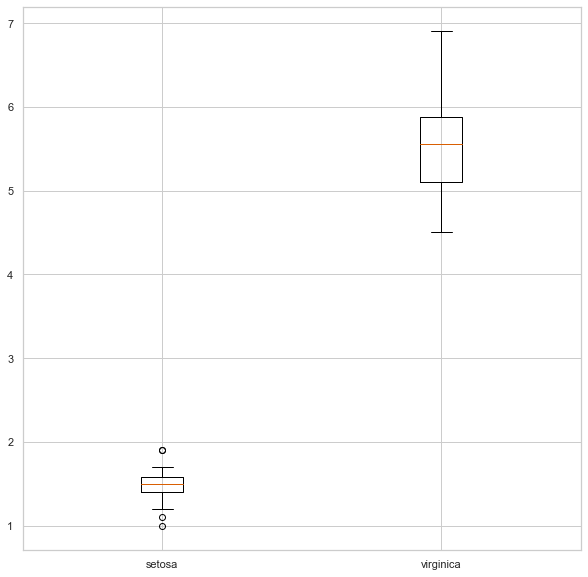

In [15]:
plt.figure(figsize = (10, 10))
plt.boxplot((data[data["Species"] == "setosa"]["Petal.Length"],  data[data["Species"] == "virginica"]["Petal.Length"]), labels = ("setosa", "virginica"))

На общем графике "ящик с усами" аномальных наблюдений не обнаружено.
Однако на втором  "ящике с усами" аномальное наблюдение наблюдается в наборе данных, соответствующему переменной PETALLEN для вида ирисов setosa. 

### 6.	Проверить гипотезу о том, что соответствующие выборки наблюдений являются случайными выборками из многомерного нормального распределения; дать содержательную интерпретацию этому предположению.

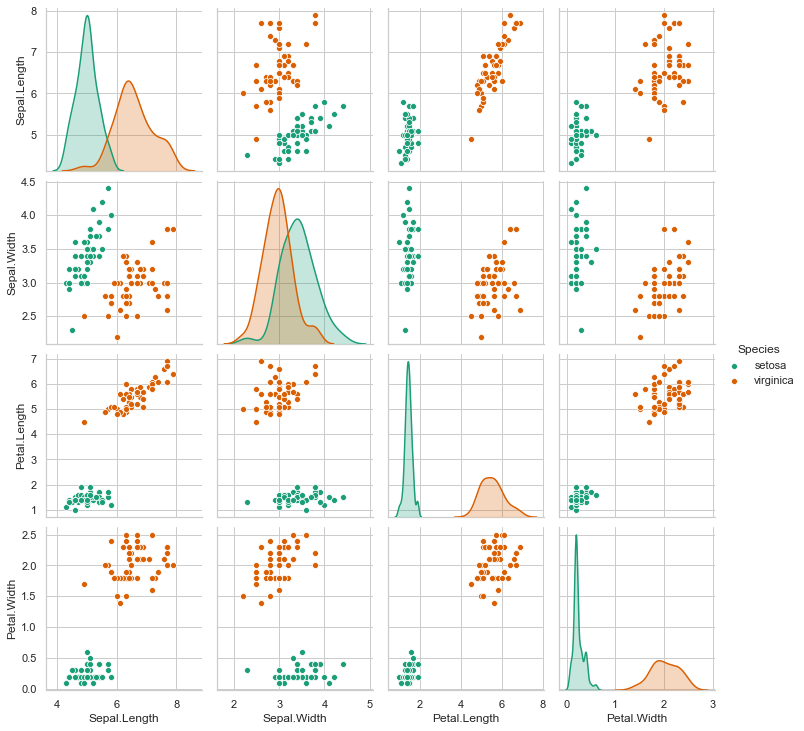

In [16]:
sns.pairplot(data, diag_kind="kde", hue="Species")

На гистограммах распределений переменных Petal.Length, Petal.Width видно, что распределения данных вовсе не близки к нормальным, а это позволяет с уверенностью сказать, что смесь из видов ирисов setosa и virginica не соответствует многомерному нормальному распределению, так как по свойствам многомерного нормального распределения каждый из признаков имеет одномерное нормальное распределение (как в случае переменной Sepal.Width).